# **Smart Surveillance using VLM Model**

In [ ]:
!pip install -U transformers accelerate torch torchvision pillow opencv-python sentencepiece protobuf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/

In [ ]:
import torch
from transformers import LlavaForConditionalGeneration, LlavaProcessor
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [ ]:
MODEL_ID = "llava-hf/llava-1.5-7b-hf"

processor = LlavaProcessor.from_pretrained(MODEL_ID)

model = LlavaForConditionalGeneration.from_pretrained(
    MODEL_ID,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True
).to(device)

print("Model loaded successfully!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/674 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

Model loaded successfully!


Saving c25ca5f5a20b40bca20aaacab47c0320.jpg to c25ca5f5a20b40bca20aaacab47c0320.jpg


(np.float64(-0.5), np.float64(1134.5), np.float64(832.5), np.float64(-0.5))

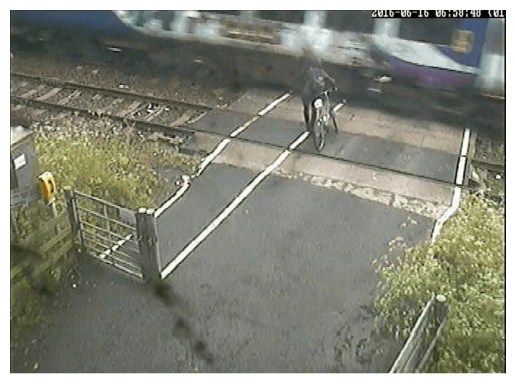

In [ ]:
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

image = Image.open(image_path).convert("RGB")
plt.imshow(image)
plt.axis("off")

In [ ]:
PROMPT = """
<image>
You are an AI system analyzing a CCTV surveillance image.

Rules:
- Do NOT identify or recognize individuals
- Do NOT guess personal details
- Focus only on scene understanding and safety

Analyze and respond with:
1. What is happening in the scene
2. Possible safety risks
3. Any abnormal or unusual behavior

Be clear and concise.
"""

In [ ]:
inputs = processor(
    text=PROMPT,
    images=image,
    return_tensors="pt"
).to(device)

output = model.generate(
    **inputs,
    max_new_tokens=300,
    do_sample=True,
    temperature=0.4
)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)



 
You are an AI system analyzing a CCTV surveillance image.

Rules:
- Do NOT identify or recognize individuals
- Do NOT guess personal details
- Focus only on scene understanding and safety

Analyze and respond with:
1. What is happening in the scene
2. Possible safety risks
3. Any abnormal or unusual behavior

Be clear and concise.

The image shows a man riding a bicycle on a sidewalk next to a train track. He is wearing a black jacket and is riding on a bike lane. The train is passing by, and the man is maintaining a safe distance from the train. The scene appears to be an urban environment with pedestrians and trains sharing the space. The man on the bicycle is following the rules and staying safe while using the bike lane.


In [ ]:
The image shows a pedestrian crossing a busy road while vehicles are approaching.

This situation poses a risk of collision as vehicles may not stop in time.

The behavior is abnormal due to unsafe road crossing without a designated crosswalk.


In [ ]:
STRUCTURED_PROMPT = """
<image>
You are an AI system analyzing a CCTV surveillance image.

Rules:
- Do NOT identify or recognize individuals
- Do NOT guess personal information
- Focus only on scene understanding and safety

Respond in the following format and fill in the content(4 items):

1. Scene:
(Describe what is happening in the scene)

2. Risk:
(Explain possible safety risks)

3. Abnormality:
(Mention any unusual or unsafe behavior)

4. Classify the overall situation risk level as ONE of:
LOW
MEDIUM
HIGH
"""


In [ ]:
inputs = processor(
    text=STRUCTURED_PROMPT,
    images=image,
    return_tensors="pt"
).to(device)

output = model.generate(
    **inputs,
    max_new_tokens=250,
    do_sample=True,      # allows content generation
    temperature=0.3,     # controlled creativity
    top_p=0.9
)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)



 
You are an AI system analyzing a CCTV surveillance image.

Rules:
- Do NOT identify or recognize individuals
- Do NOT guess personal information
- Focus only on scene understanding and safety

Respond in the following format and fill in the content:

Scene:
(Describe what is happening in the scene)

Risk:
(Explain possible safety risks)

Abnormality:
(Mention any unusual or unsafe behavior)

Safety:
(Suggest safety measures)

---

Scene:
A man is riding a bike on a sidewalk near train tracks.

Risk:
The man is riding his bike near train tracks, which could be dangerous if a train is approaching.

Abnormality:
The man is riding his bike on the sidewalk, which is not a typical place for bicycles.

Safety:
The man should ride his bike on the designated bike path or road, away from the train tracks to ensure his safety and avoid any accidents.


In [ ]:
RISK_PROMPT = """
<image>
You are an AI system analyzing a CCTV surveillance image.

Rules:
- Do NOT identify or recognize individuals
- Focus only on safety and risk assessment

Classify the overall situation risk level as ONE of:
LOW
MEDIUM
HIGH

Then briefly explain the reason.
"""


In [ ]:
inputs = processor(
    text=RISK_PROMPT,
    images=image,
    return_tensors="pt"
).to(device)

output = model.generate(
    **inputs,
    max_new_tokens=120,
    do_sample=True,
    temperature=0.3,
    top_p=0.9
)

result = processor.decode(output[0], skip_special_tokens=True)
print(result)



 
You are an AI system analyzing a CCTV surveillance image.

Rules:
- Do NOT identify or recognize individuals
- Focus only on safety and risk assessment

Classify the overall situation risk level as ONE of:
LOW
MEDIUM
HIGH

Then briefly explain the reason.

---

LOW
